<a href="https://colab.research.google.com/github/baranhokelek/PHYS-550-graph-theory/blob/main/HW2_bhokelek16_0060673.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [29]:
def initialize_BA_graph(m_0):
  return nx.complete_graph(m_0)

In [30]:
def plot_graph(G):
  nx.draw(G, with_labels=True, font_weight='bold')
  plt.show()

Checkpoint 1
Checkpoint 1
Checkpoint 2
Checkpoint 2
Checkpoint 3
Checkpoint 3
Checkpoint 3


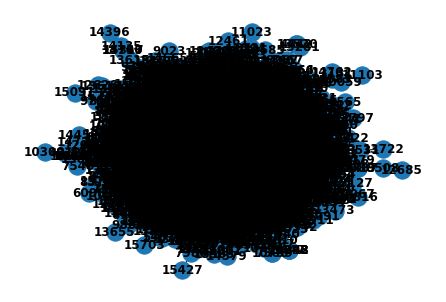

In [64]:
m_0 = 4
G = initialize_BA_graph(m_0)
new_node_num = m_0
G1E2 = nx.Graph()
G1E3 = nx.Graph()
G1E4 = nx.Graph()
num_edges = G.number_of_edges()
while len(G) <= 10000:
  for node in list(G.nodes()):
    if (random.random() <= G.degree(node)/(2 * num_edges)):
          G.add_edge(new_node_num, node)
          num_edges += 1
  new_node_num += 1
  if len(G) == 100:
    print("Checkpoint 1")
    G1E2 = G.copy()
  if len(G) == 1000:
    print("Checkpoint 2")
    G1E3 = G.copy()
  if len(G) == 10000:
    print("Checkpoint 3")
    G1E4 = G.copy()

In [134]:
def plot_degree_distr(G):
  """
  Plots a log-log distribuiton function for the degrees of nodes in a graph. Used to show the existence of a power law relation in a scale-free network.
  """
  degrees = [G.degree(n) for n in G.nodes()]
  degrees_counts = np.unique(degrees, return_counts=True)
  degrees = degrees_counts[0]
  probs = degrees_counts[1] / len(G)
  coef = np.polyfit(np.log(degrees), np.log(probs), 1)
  poly1d_fn = np.poly1d(coef) 
  plt.grid()
  plt.loglog(degrees, probs, 'bo', label = 'Degree distribution')
  plt.loglog(degrees, np.power(degrees, coef[0]), '--k', label = 'Power law approx.')
  plt.title(f'Degree distribution for a network with {len(G)} vertices ($\gamma = {-coef[0]}$)')
  plt.xlabel('k')
  plt.ylabel('P(k)')
  plt.legend()
  plt.show()

In [153]:
def plot_cum_degree_distr(G):
  """
  Plots a cumulative distribuiton function for the degrees of nodes in a graph.
  """
  degrees = np.sort([G.degree(n) for n in G.nodes()])
  degrees_counts = np.unique(degrees, return_counts=True)
  degrees = degrees_counts[0]
  probs = degrees_counts[1] / len(G)
  plt.grid()
  plt.plot(degrees, np.cumsum(probs), 'ro', label='Cumulative degree distr.')
  plt.title(f'Cumulative degree distribution for a network with {len(G)} vertices')
  plt.xlabel('k')
  plt.ylabel('C(k)')
  plt.legend()
  plt.show()

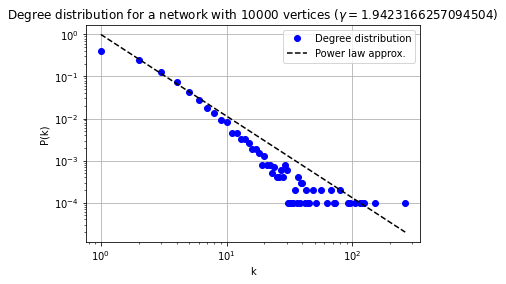

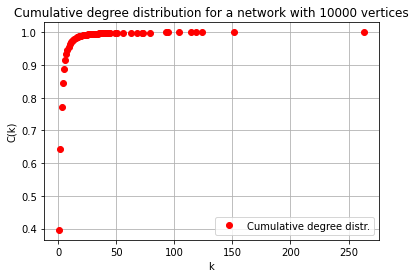

The average clustering coefficient for this graph is 0.0018274849673379223.


In [159]:
plot_degree_distr(G1E4)
plot_cum_degree_distr(G1E4)
print(f'The average clustering coefficient for this graph is {nx.average_clustering(G1E4)}.')

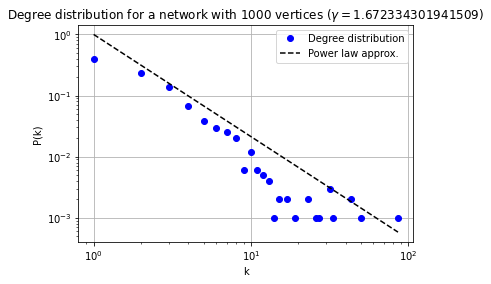

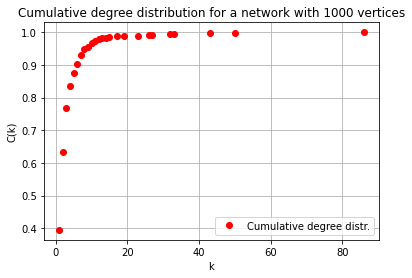

The average clustering coefficient for this graph is 0.012470019659930425.


In [157]:
plot_degree_distr(G1E3)
plot_cum_degree_distr(G1E3)
print(f'The average clustering coefficient for this graph is {nx.average_clustering(G1E3)}.')

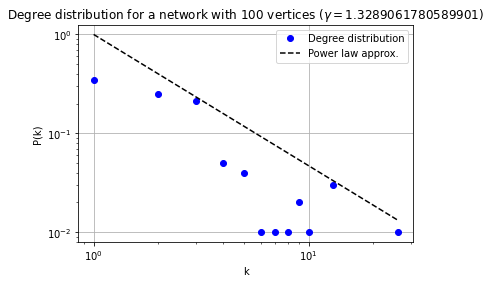

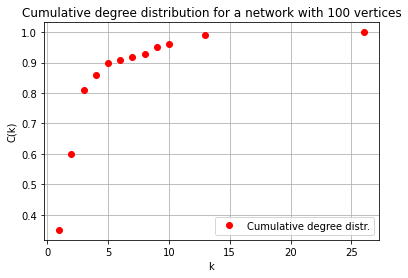

The average clustering coefficient for this graph is 0.04251013431013431.


In [158]:
plot_degree_distr(G1E2)
plot_cum_degree_distr(G1E2)
print(f'The average clustering coefficient for this graph is {nx.average_clustering(G1E2)}.')